# Introduction

### Dataset

merupakan data karyawan pada sebuah perusahaan besar bernama XYZ, yang mempekerjakan sekitar 4000 karyawan.


### Sumber data

Data asli berasal dari data kaggle dengan link : https://www.kaggle.com/vjchoudhary7/hr-analytics-case-study?select=general_data.csv



### Objectivitas

Membuat model klasifikasi untuk memprediksi karyawan yang akan berhenti dan karyawan yang akan bertahan  

# Import Pustaka

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

# model classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

# for pipeline
from sklearn.pipeline import Pipeline, make_pipeline

## for feature slection
from sklearn.feature_selection import SelectFromModel

# for preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV


# for handle imbalaced dataset
from imblearn.over_sampling import SMOTE

# for matrics evaluation
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# Data loading

In [2]:
data = pd.read_csv('general_data.csv')

#### melihat data teratas

In [3]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


#### melihat data terbawah

In [4]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9


#### melihat informasi data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### melihat statistika data

In [6]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


#### melihat dimensi data

In [7]:
data.shape

(4410, 24)

data memiliki dimenasi 4410 rows dan dan 24 columns

# Data Cleaning

#### melakukan pengecekan data missing values

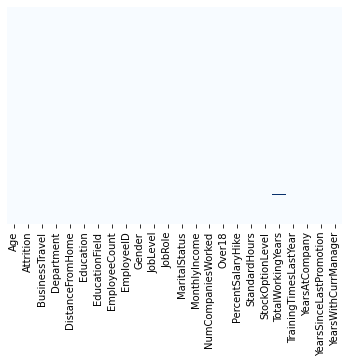

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap="Blues");

# Explorasi Data Analysis

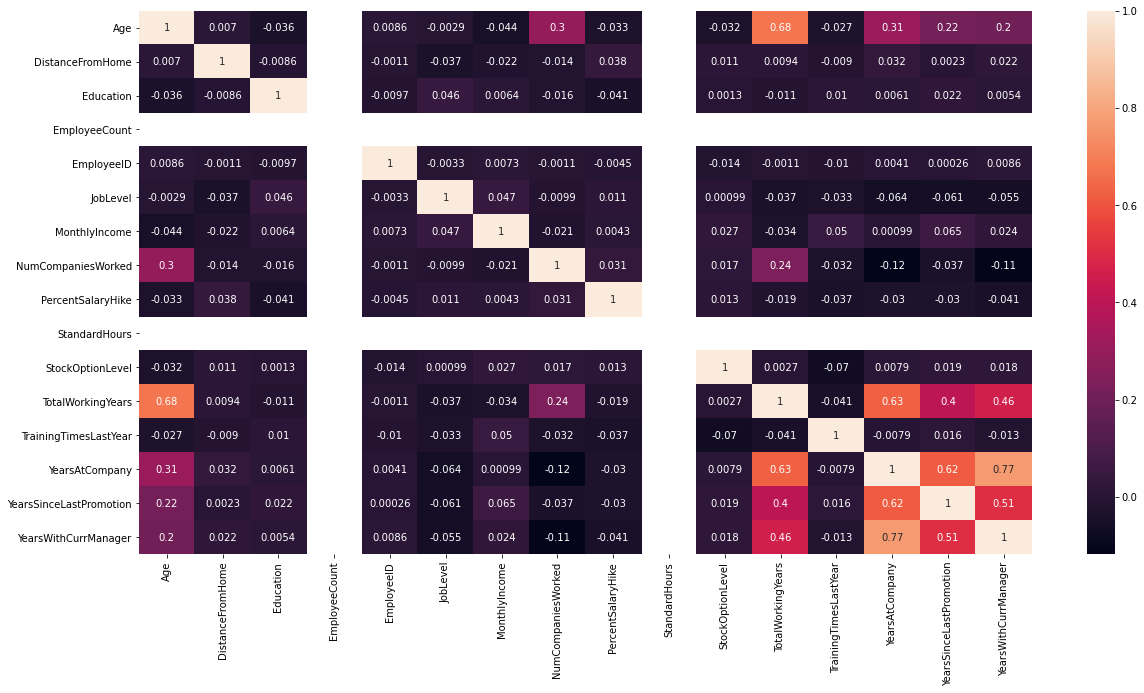

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True);

dari visualisasi terlihat ada beberapa feature yang memiliki korelasi kuat yaitu:
* antara feature Age dan TotalWorkingYears sebesar 0.68
* antara feature TotalWorkingYears dan YearsAtCompany sebesar 0.63
* antara feature YearsAtCompany dan YearsSinceLastPromotion sebesar 0.62
* antara feature YearsAtCompany danYearsWithCurrManager sebesar 0.77

#### Visualisasi Feature Attrition

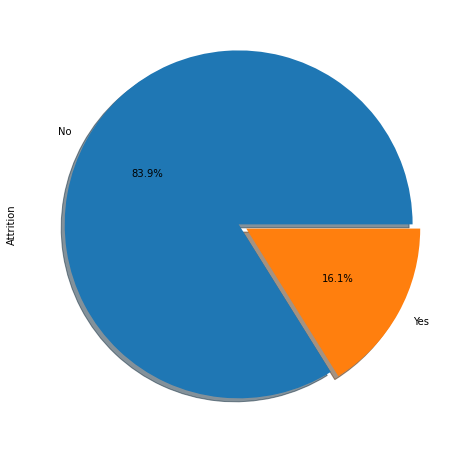

In [10]:
plt.figure(figsize=(8,8))
data['Attrition'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%', shadow=True);

dari visualisasi terlihat bahwa karyawan yang akan berhenti sebanyak 16% dan yang bertahan sebanyak 84% 

### Numerical Features

In [11]:
numerical_features = [var for var in data.columns if data[var].dtype!='O']

print("Jumlah numerical features {}".format(len(numerical_features)))
print("\n")
print("numerical features : \n ", numerical_features)

Jumlah numerical features 16


numerical features : 
  ['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


#### discrete features

In [12]:
discrete_features = [var for var in data.columns if data[var].dtype!='O'  and data[var].nunique()<10]

print("Jumlah discrete Features {}".format(len(discrete_features)))
print("\n")
print("discrete Features : \n ", discrete_features)

Jumlah discrete Features 6


discrete Features : 
  ['Education', 'EmployeeCount', 'JobLevel', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear']


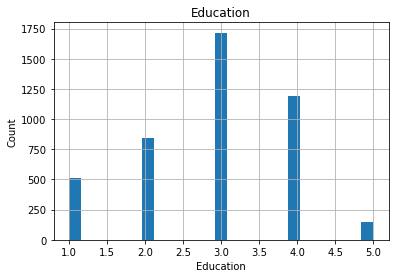

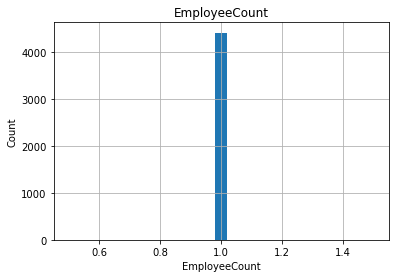

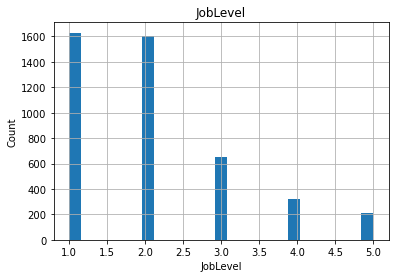

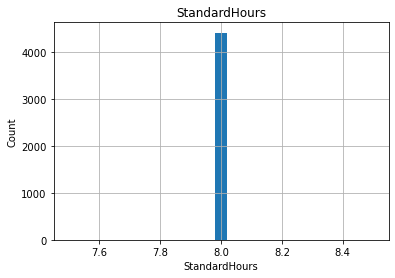

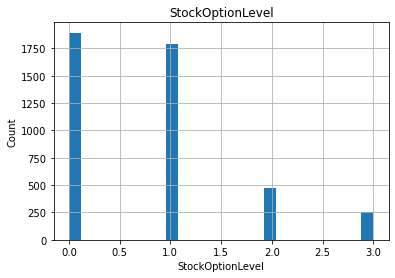

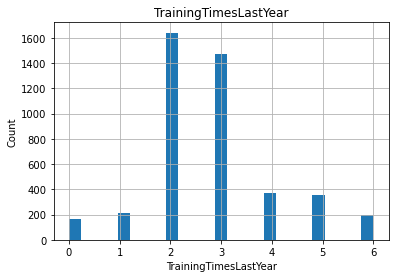

In [13]:
for feature in discrete_features:
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### continuous feature

In [14]:
continuous_feature = [var for var in data.columns if data[var].dtype!='O'  and var not in discrete_features]

print("Jumlah continuous feature {}".format(len(continuous_feature)))
print("\n")
print("continuous feature : \n ", continuous_feature)

Jumlah continuous feature 10


continuous feature : 
  ['Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


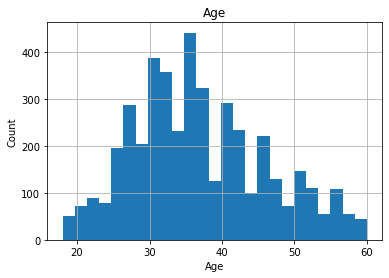

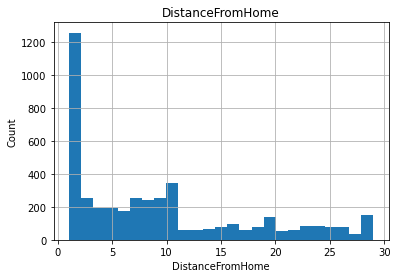

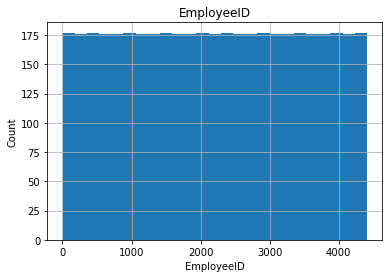

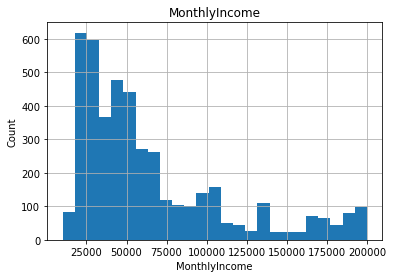

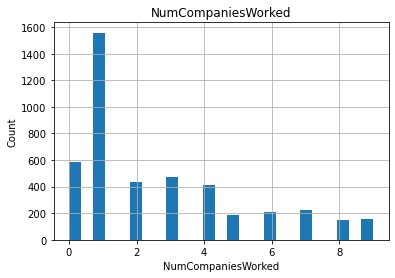

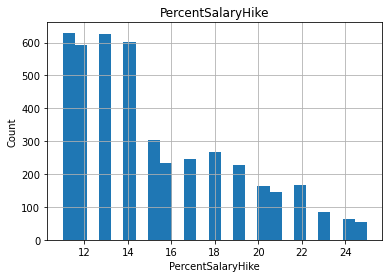

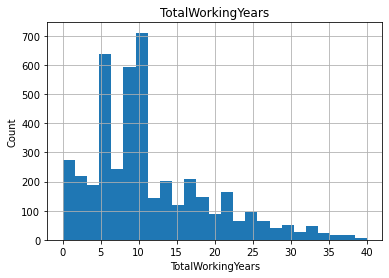

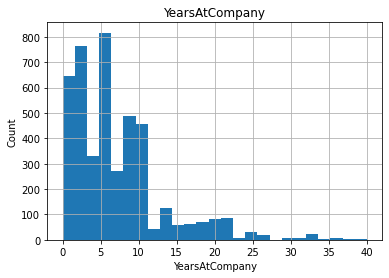

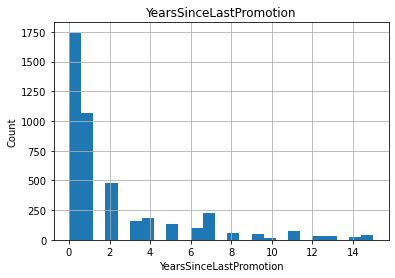

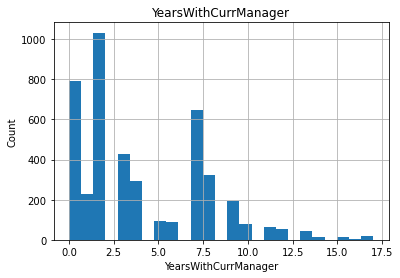

In [15]:
for feature in continuous_feature:
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

#### Visualisasi Hubungan Usia karyawan dengan keputusan Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


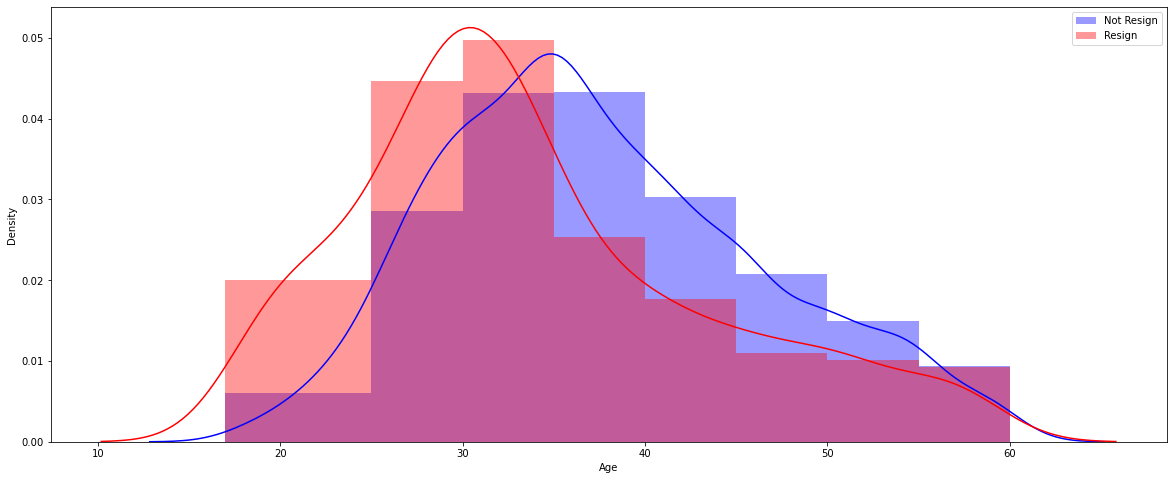

In [16]:
plt.figure(figsize=(20,8))
sns.distplot(data['Age'][data['Attrition'] == "No"], bins=[17, 25, 30, 35, 40, 45, 50, 55, 60], color='b', label='Not Resign')
sns.distplot(data['Age'][data['Attrition'] == "Yes"], bins=[17, 25, 30, 35, 40, 45, 50, 55, 60], color='r', label='Resign')
plt.legend();

Dari visualisasi terlihat bahwa kkaryawan yang memiliki kemungkinan resign berada pada rentang usia 17 sampai dengan 35 tahun

#### Visualisasi Hubungan feature DistanceFromHome dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


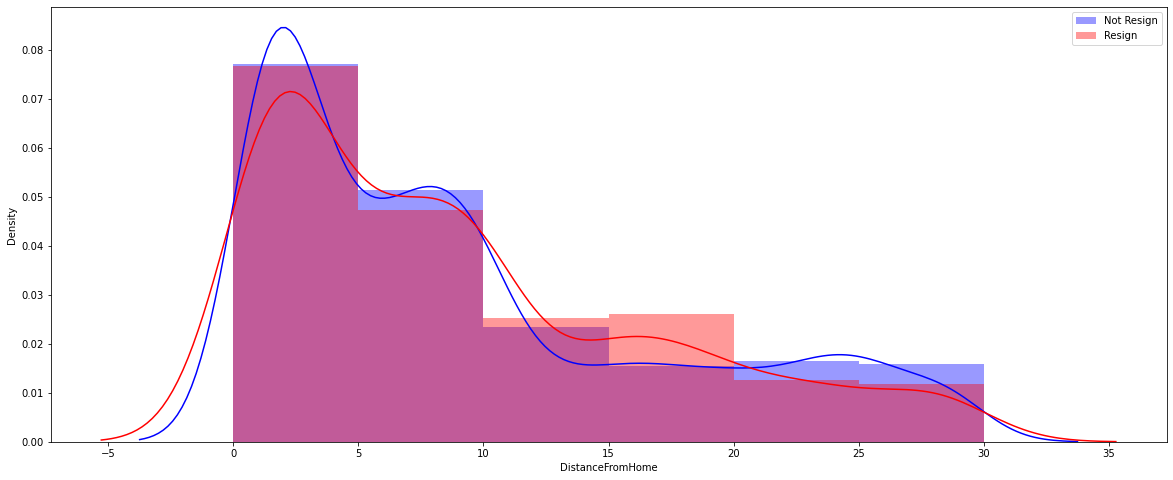

In [17]:
plt.figure(figsize=(20,8))
sns.distplot(data['DistanceFromHome'][data['Attrition'] == "No"], bins=[0, 5, 10, 15, 20, 25, 30 ], color='b', label='Not Resign')
sns.distplot(data['DistanceFromHome'][data['Attrition'] == "Yes"], bins=[0, 5, 10, 15, 20, 25, 30 ], color='r', label='Resign')
plt.legend();

Dari visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah yang memiliki rentang jarak rumah dari 10 sampai 20 

#### Visualisasi Hubungan feature Education dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


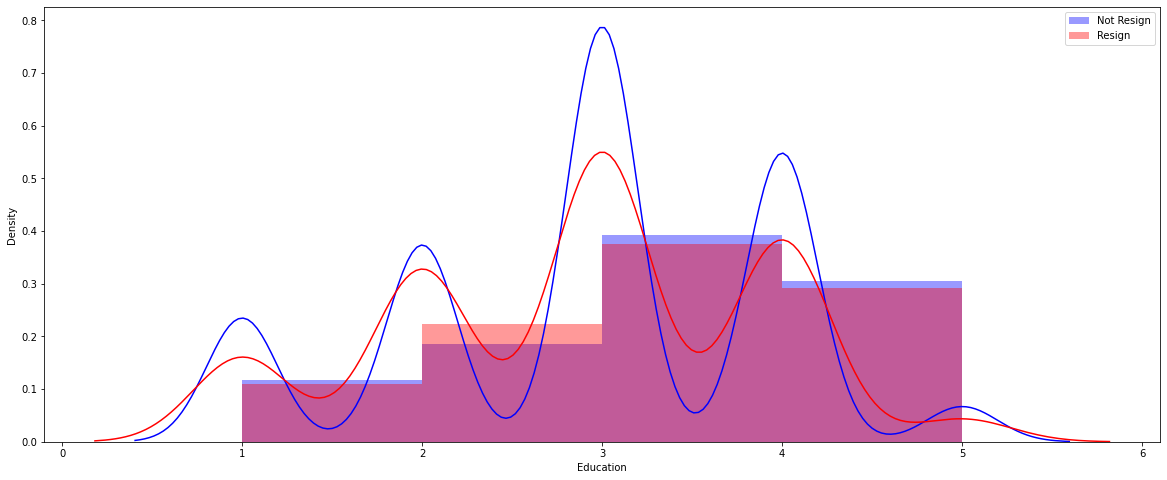

In [18]:
plt.figure(figsize=(20,8))
sns.distplot(data['Education'][data['Attrition'] == "No"], bins=[1, 2, 3, 4, 5], color='b', label='Not Resign')
sns.distplot(data['Education'][data['Attrition'] == "Yes"], bins=[1, 2, 3, 4, 5], color='r', label='Resign')
plt.legend();

Dari visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah dengan kategori edukasi kategori 2

#### Visualisasi Hubungan feature JobLevel dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


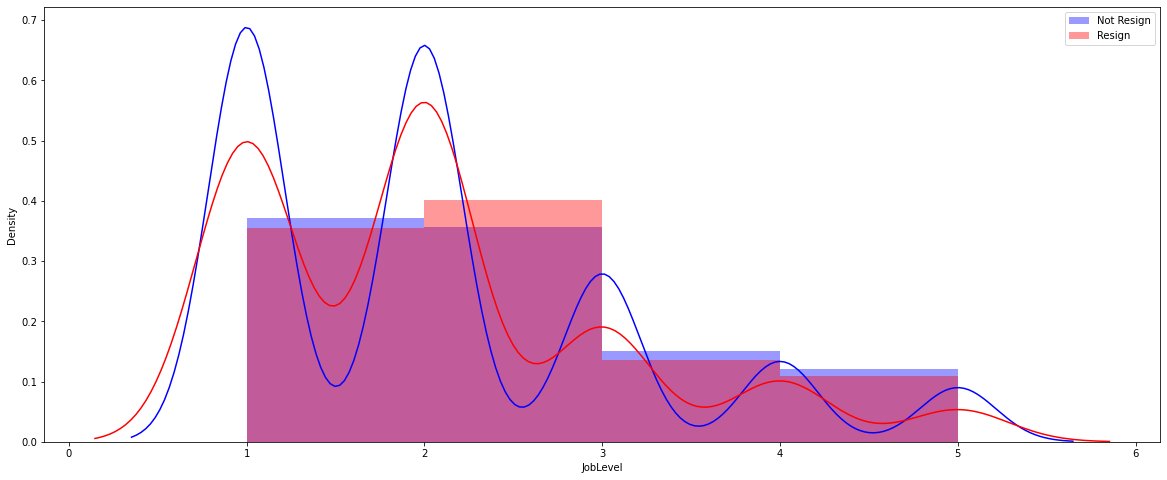

In [19]:
plt.figure(figsize=(20,8))
sns.distplot(data['JobLevel'][data['Attrition'] == "No"], bins=[1, 2, 3, 4, 5], color='b', label='Not Resign')
sns.distplot(data['JobLevel'][data['Attrition'] == "Yes"], bins=[1, 2, 3, 4, 5], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada job level 2

#### Visualisasi Hubungan feature MonthlyIncome dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


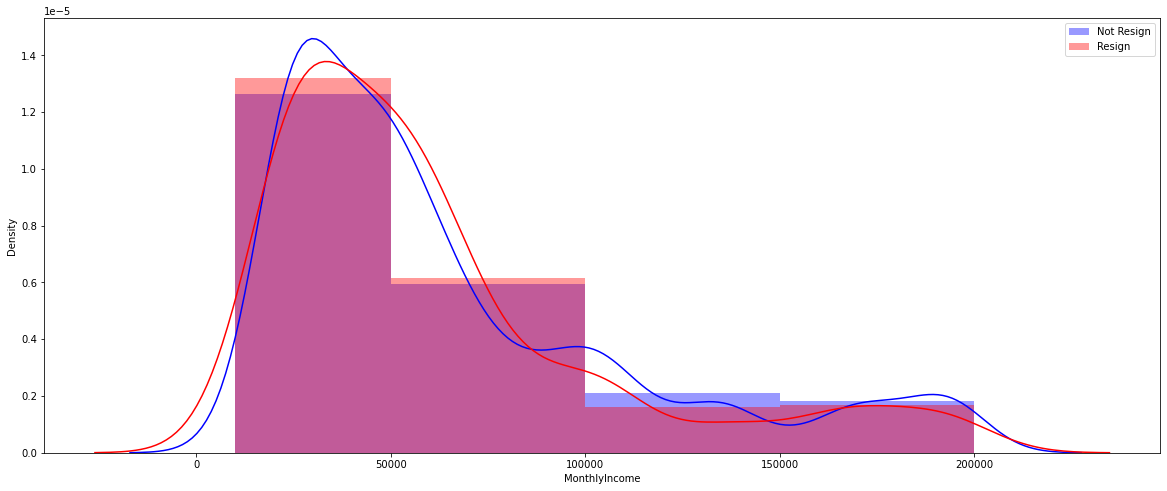

In [20]:
plt.figure(figsize=(20,8))
sns.distplot(data['MonthlyIncome'][data['Attrition'] == "No"], bins=[10000, 50000, 100000, 150000, 200000], color='b', label='Not Resign')
sns.distplot(data['MonthlyIncome'][data['Attrition'] == "Yes"], bins=[10000, 50000, 100000, 150000, 200000], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada rentang pendapatan bulanan 10000 sampai dengan 50000

#### Visualisasi Hubungan feature NumCompaniesWorked dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


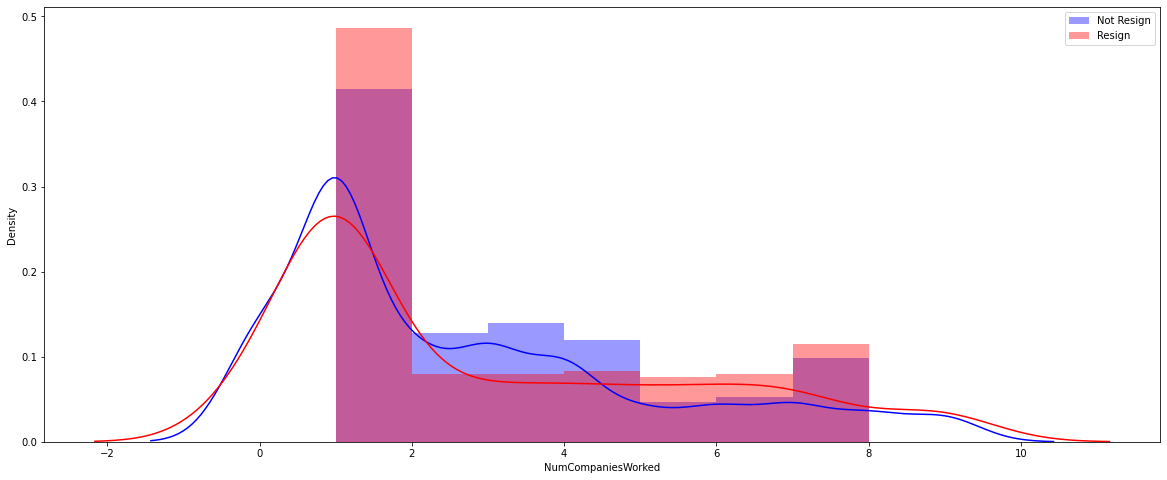

In [21]:
plt.figure(figsize=(20,8))
sns.distplot(data['NumCompaniesWorked'][data['Attrition'] == "No"], bins=[1, 2, 3, 4, 5, 6, 7, 8], color='b', label='Not Resign')
sns.distplot(data['NumCompaniesWorked'][data['Attrition'] == "Yes"], bins=[1, 2, 3, 4, 5, 6, 7, 8], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada karyawan yang telah bekerja di range 5 sampai dengan 8 diperusahaan sebelumnya 

#### Visualisasi Hubungan feature PercentSalaryHike dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


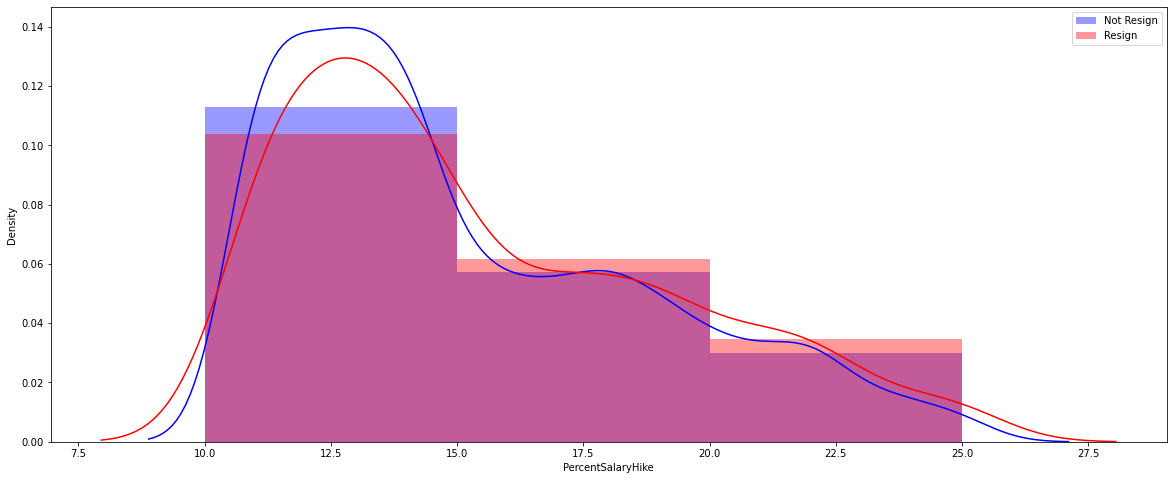

In [22]:
plt.figure(figsize=(20,8))
sns.distplot(data['PercentSalaryHike'][data['Attrition'] == "No"], bins=[10, 15, 20, 25], color='b', label='Not Resign')
sns.distplot(data['PercentSalaryHike'][data['Attrition'] == "Yes"], bins=[10, 15, 20, 25], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada rentang kenaikan pendapatan 15 samapi 25% 

#### Visualisasi Hubungan feature StockOptionLevel dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


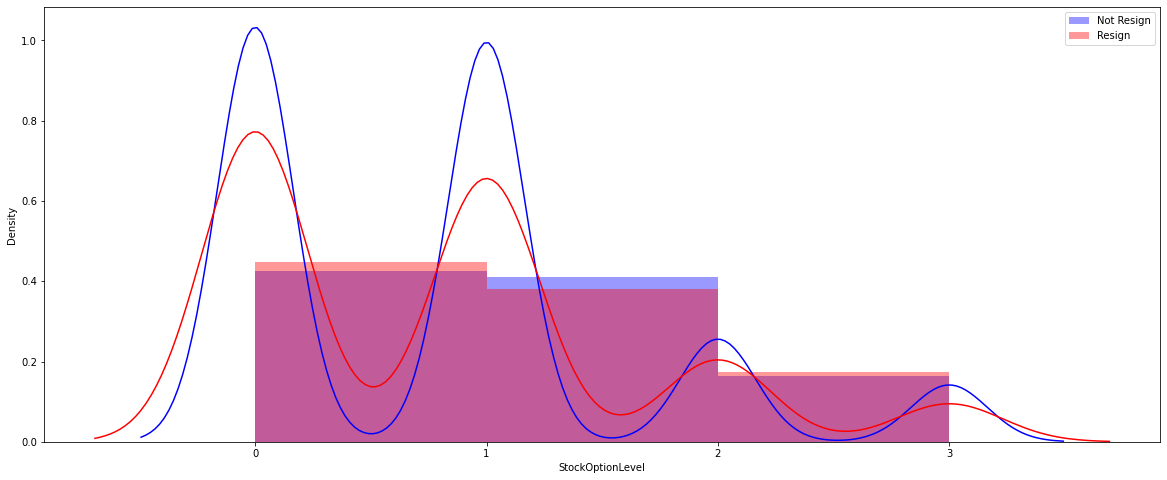

In [23]:
plt.figure(figsize=(20,8))
sns.distplot(data['StockOptionLevel'][data['Attrition'] == "No"], bins=[0, 1,2,3], color='b', label='Not Resign')
sns.distplot(data['StockOptionLevel'][data['Attrition'] == "Yes"], bins=[0, 1,2,3], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada stock option 1

#### Visualisasi Hubungan feature TotalWorkingYears dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


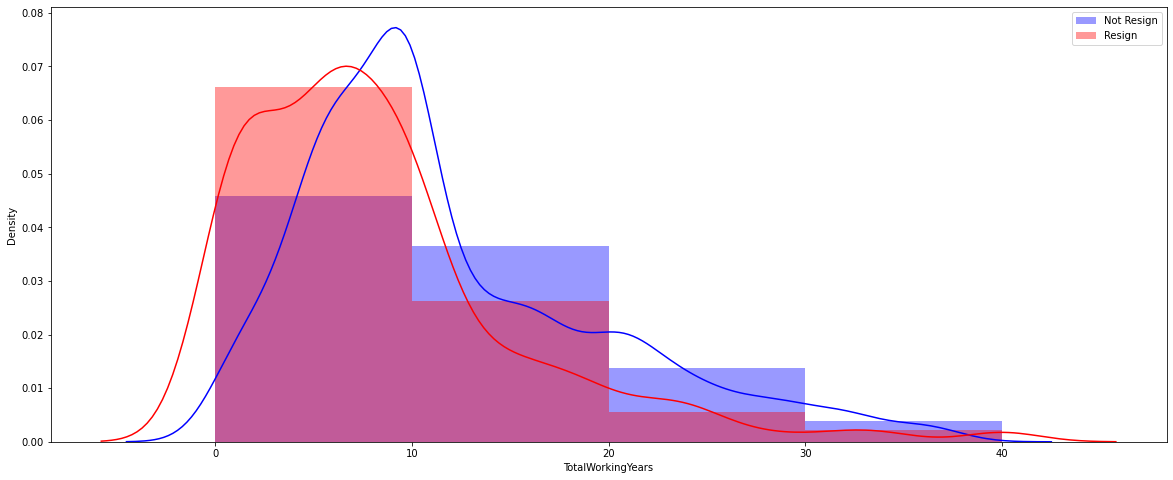

In [24]:
plt.figure(figsize=(20,8))
sns.distplot(data['TotalWorkingYears'][data['Attrition'] == "No"], bins=[0, 10,20,30, 40], color='b', label='Not Resign')
sns.distplot(data['TotalWorkingYears'][data['Attrition'] == "Yes"], bins=[0, 10,20,30, 40], color='r', label='Resign')
plt.legend();



Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada total tahun kerja 0 -10 tahun

#### Visualisasi Hubungan feature TrainingTimesLastYear dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


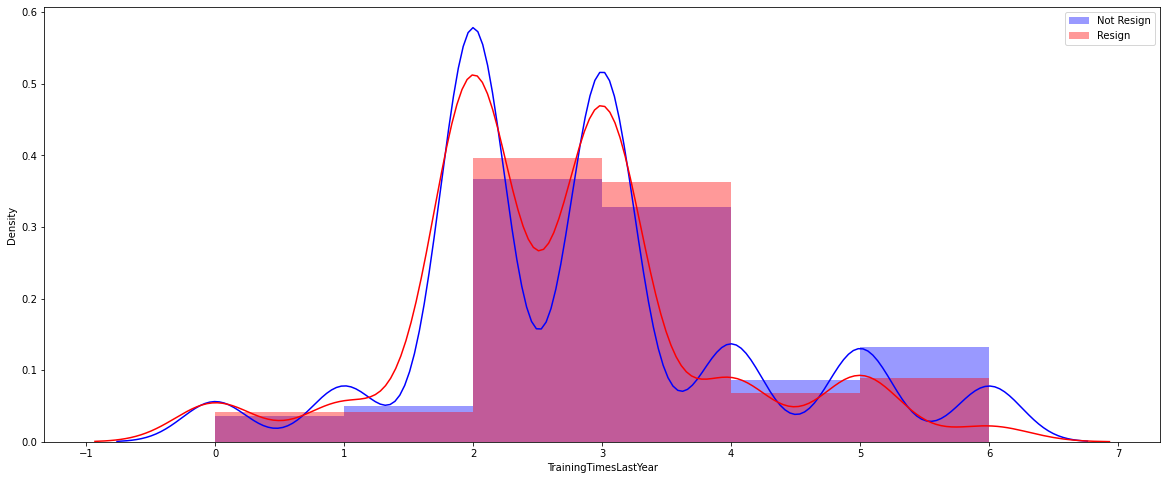

In [25]:
plt.figure(figsize=(20,8))
sns.distplot(data['TrainingTimesLastYear'][data['Attrition'] == "No"], bins=[0, 1,2,3,4,5,6], color='b', label='Not Resign')
sns.distplot(data['TrainingTimesLastYear'][data['Attrition'] == "Yes"], bins=[0, 1,2,3,4,5,6], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada TrainingTimesLastYear 2 - 4

#### Visualisasi Hubungan feature YearsAtCompany dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


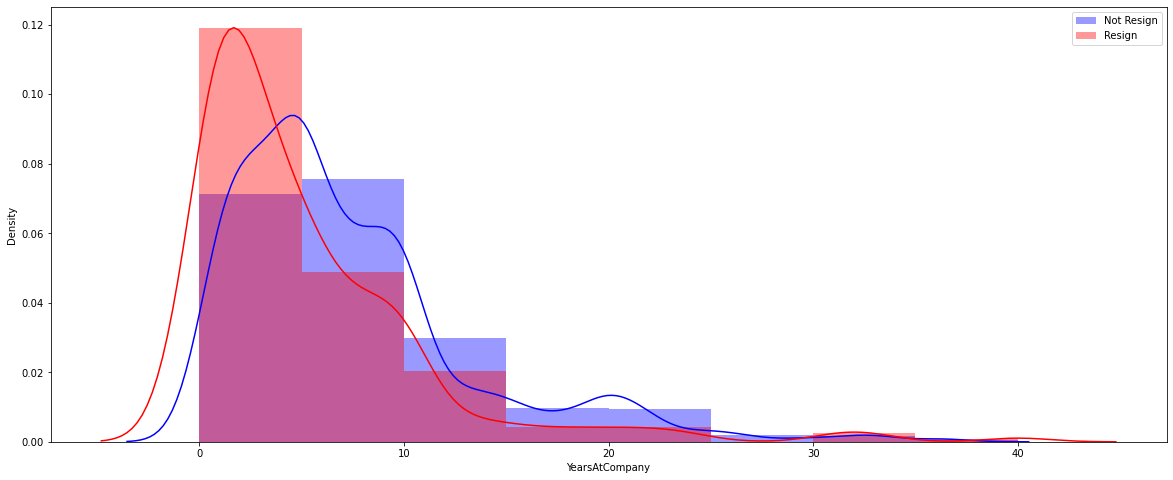

In [26]:
plt.figure(figsize=(20,8))
sns.distplot(data['YearsAtCompany'][data['Attrition'] == "No"], bins=[0,5,10,15,20,25,30,35,40], color='b', label='Not Resign')
sns.distplot(data['YearsAtCompany'][data['Attrition'] == "Yes"], bins=[0,5,10,15,20,25,30,35,40], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan yang telah bekerja diperusahaan dalam rentang waktu 0 sampai 5 tahun

#### Visualisasi Hubungan feature YearsSinceLastPromotion dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


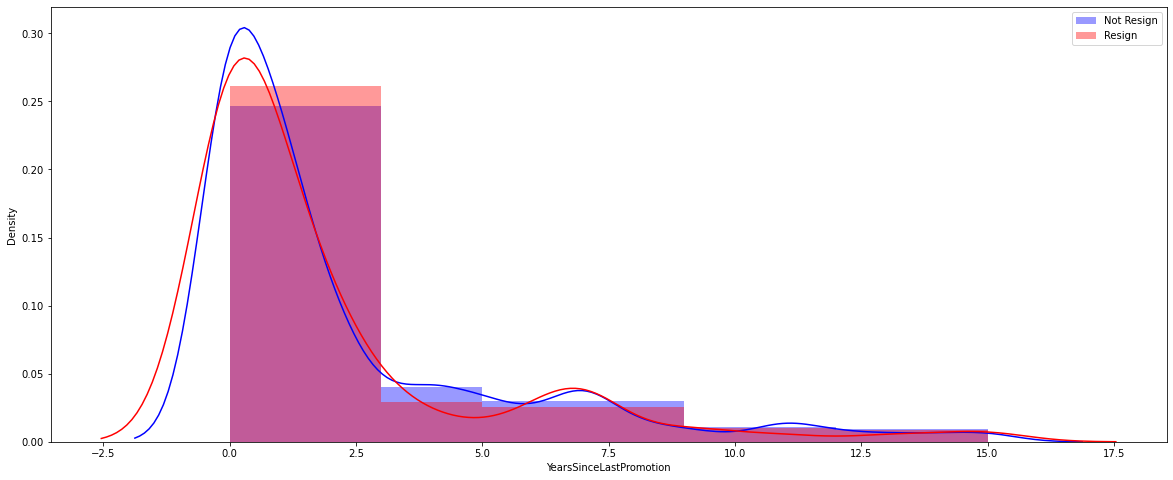

In [27]:
plt.figure(figsize=(20,8))
sns.distplot(data['YearsSinceLastPromotion'][data['Attrition'] == "No"], bins=[0,3,5,9,12,15], color='b', label='Not Resign')
sns.distplot(data['YearsSinceLastPromotion'][data['Attrition'] == "Yes"], bins=[0,3,5,9,12,15], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan yang telah memiliki rentang waktu 0 sampai 3 tahun setelah mendapatkan promosi terakhir

#### Visualisasi Hubungan feature YearsWithCurrManager dengan feature Attrition

/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dody/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


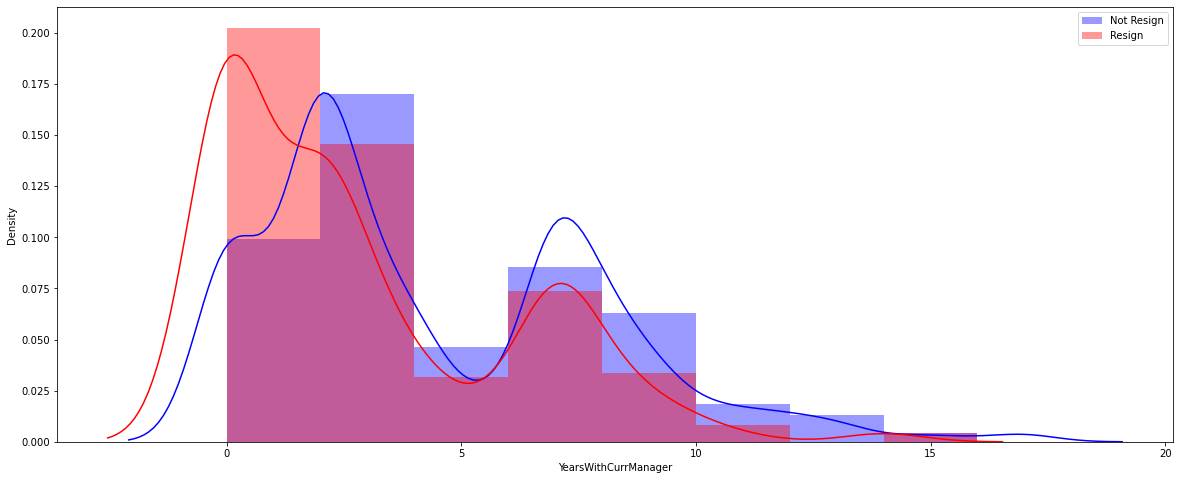

In [28]:
plt.figure(figsize=(20,8))
sns.distplot(data['YearsWithCurrManager'][data['Attrition'] == "No"], bins=[0,2,4,6,8,10,12,14,16], color='b', label='Not Resign')
sns.distplot(data['YearsWithCurrManager'][data['Attrition'] == "Yes"], bins=[0,2,4,6,8,10,12,14,16], color='r', label='Resign')
plt.legend();

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan yang telah memiliki rentang waktu 0 sampai 2 tahun bekerja dengan manager saat ini

### Categorical Features

In [29]:
Categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']

print("Jumlah Categorical features {}".format(len(Categorical_features)))
print("\n")
print("Categorical features : \n ", Categorical_features)

Jumlah Categorical features 8


Categorical features : 
  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18']


#### Visualisasi Hubungan feature BusinessTravel dengan feature Attrition

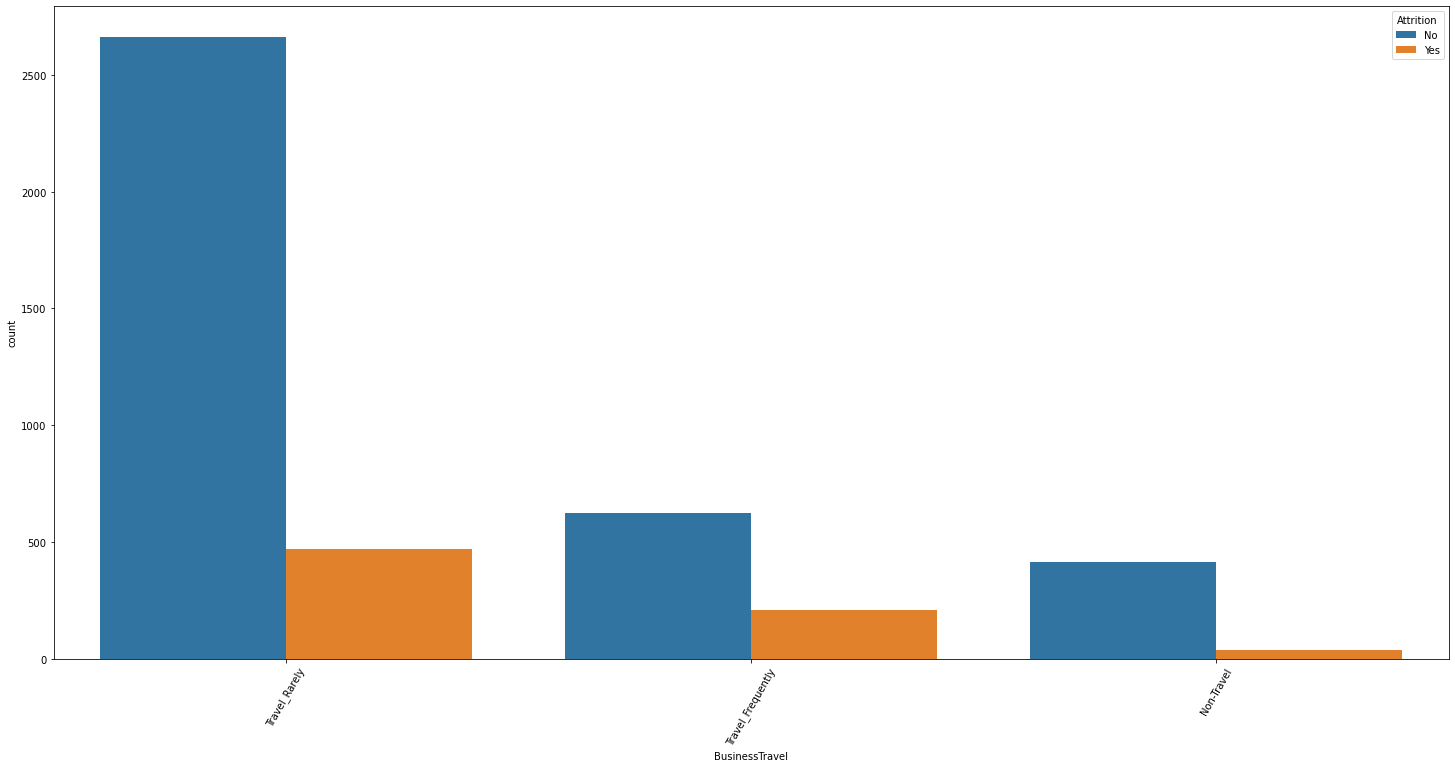

In [30]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'BusinessTravel', hue = 'Attrition', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan jarang melakukan business travel

#### Visualisasi Hubungan feature Department dengan feature Attrition

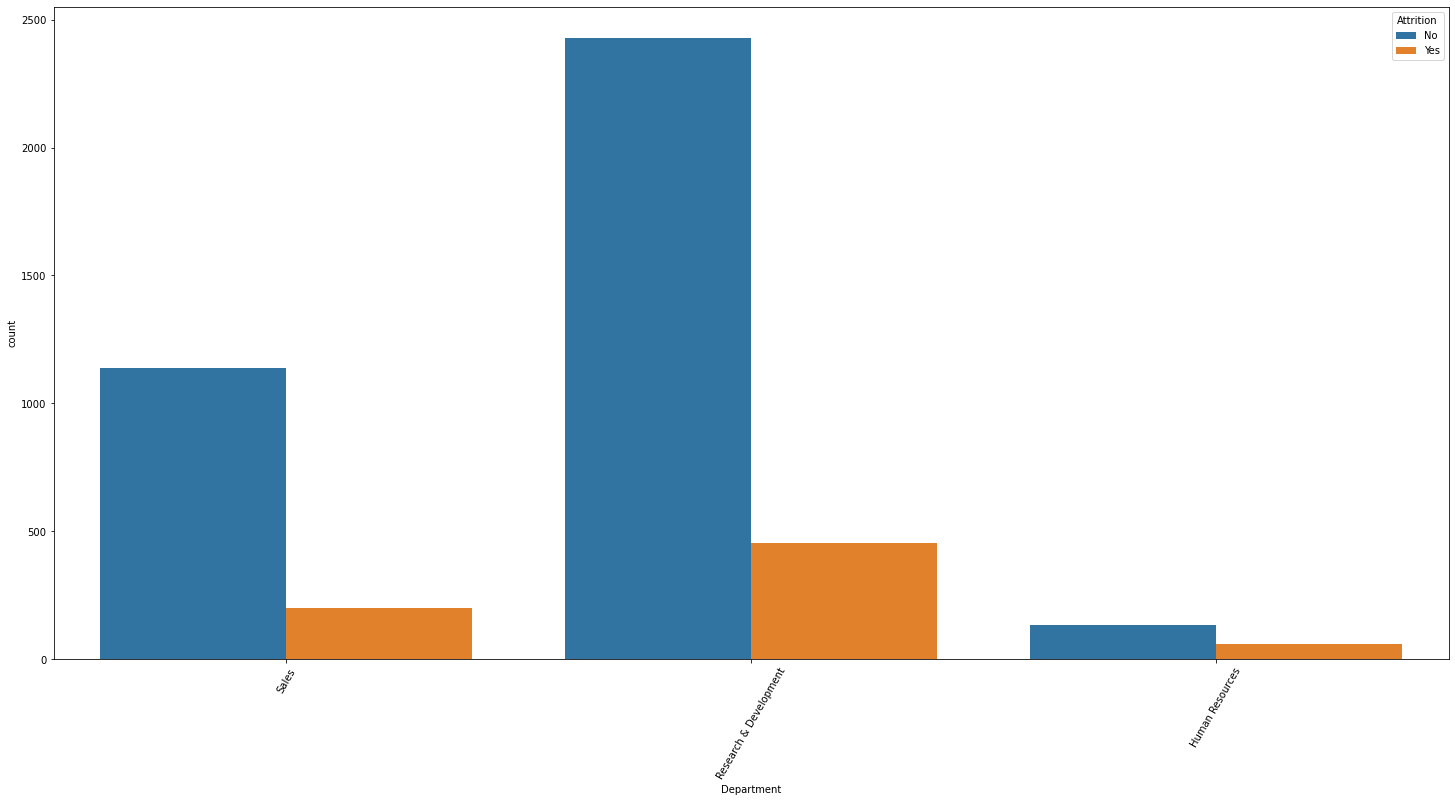

In [31]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Department', hue = 'Attrition', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dari departemen research and development

#### Visualisasi Hubungan feature EducationField dengan feature Attrition

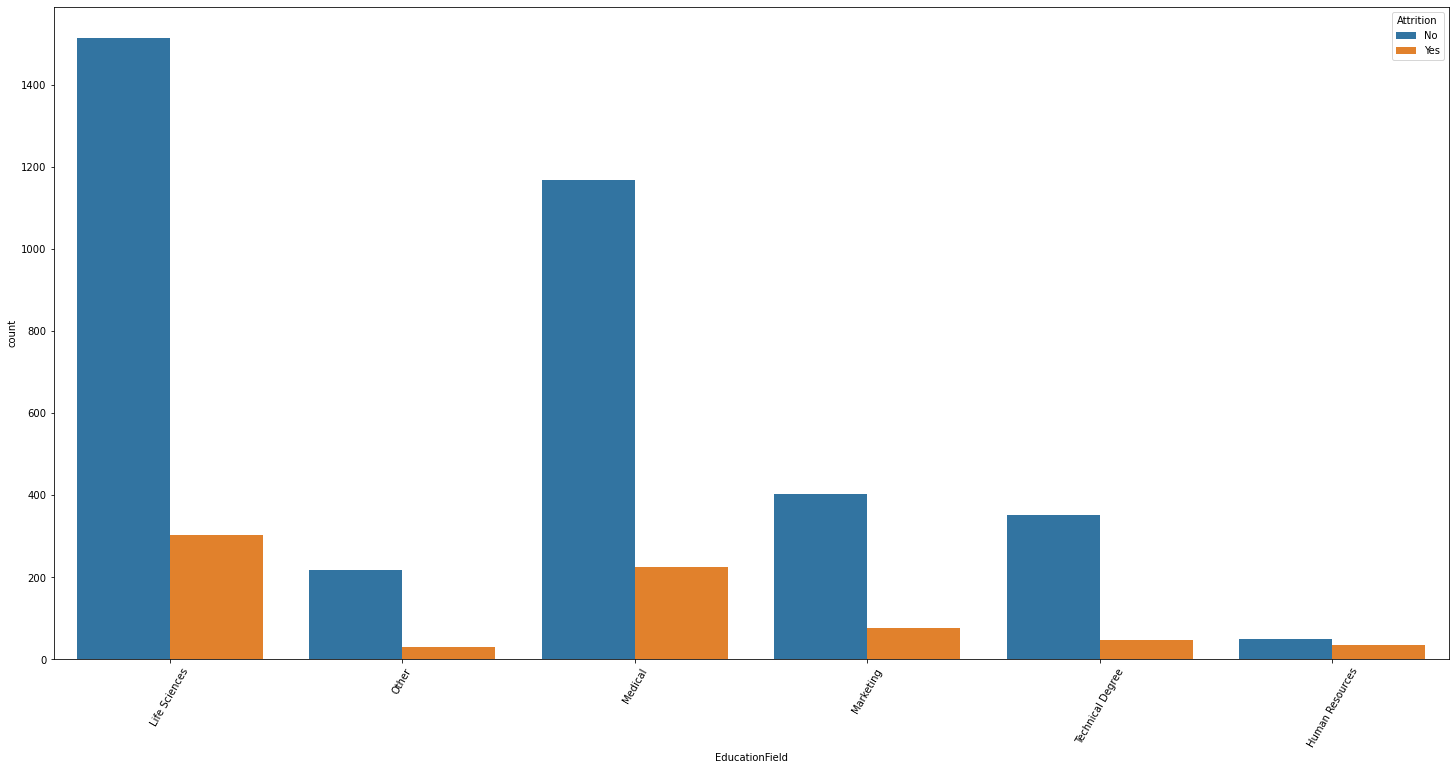

In [32]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'EducationField', hue = 'Attrition', data = data);
plt.xticks(rotation = 60); 

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dengan latar belakang pendidikan Life sciences dan medical 

#### Visualisasi Hubungan feature Gender dengan feature Attrition

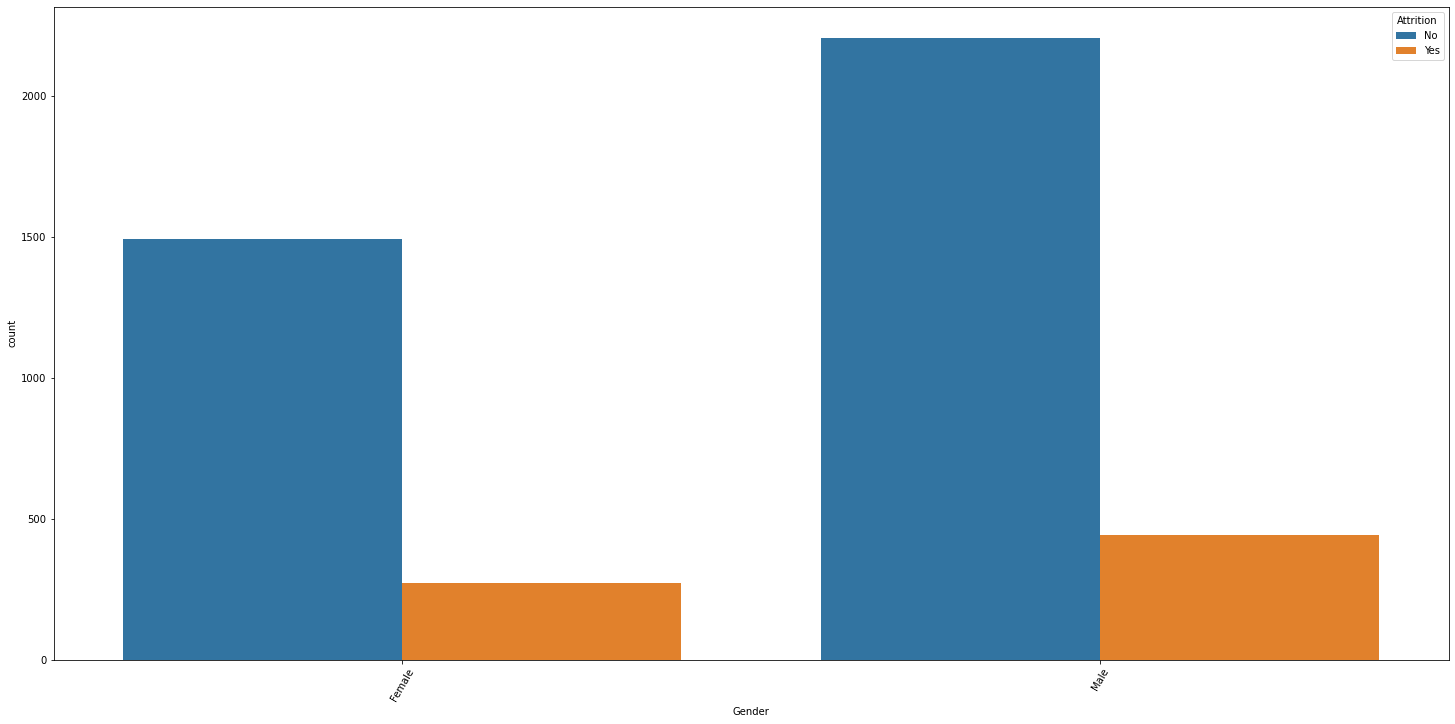

In [33]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Gender', hue = 'Attrition', data = data);
plt.xticks(rotation = 60); 

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan pria

#### Visualisasi Hubungan feature JobRole dengan feature Attrition

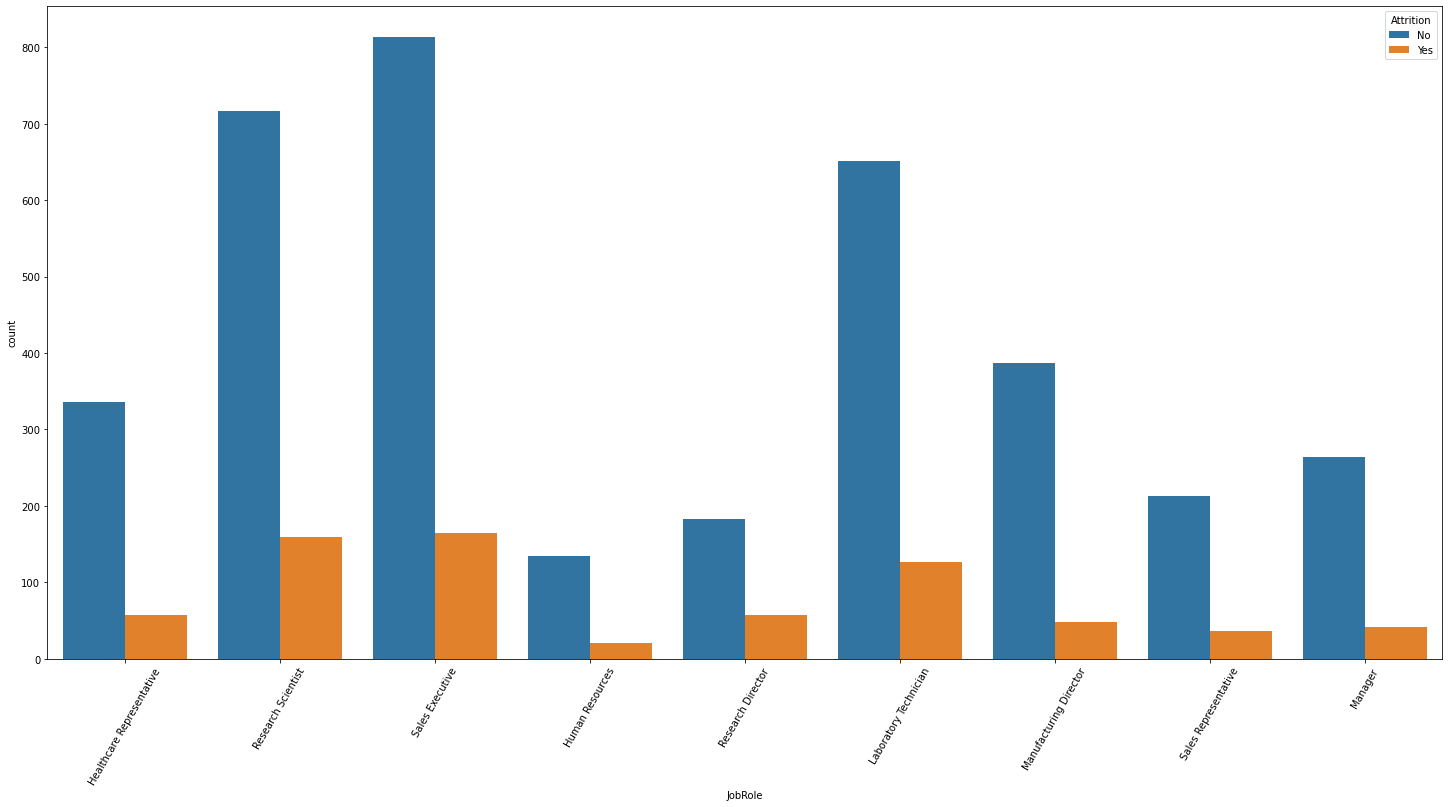

In [34]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data);
plt.xticks(rotation = 60); 

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dengan job rule Sales executive dan Research Scientist

#### Visualisasi Hubungan feature MaritalStatus dengan feature Attrition

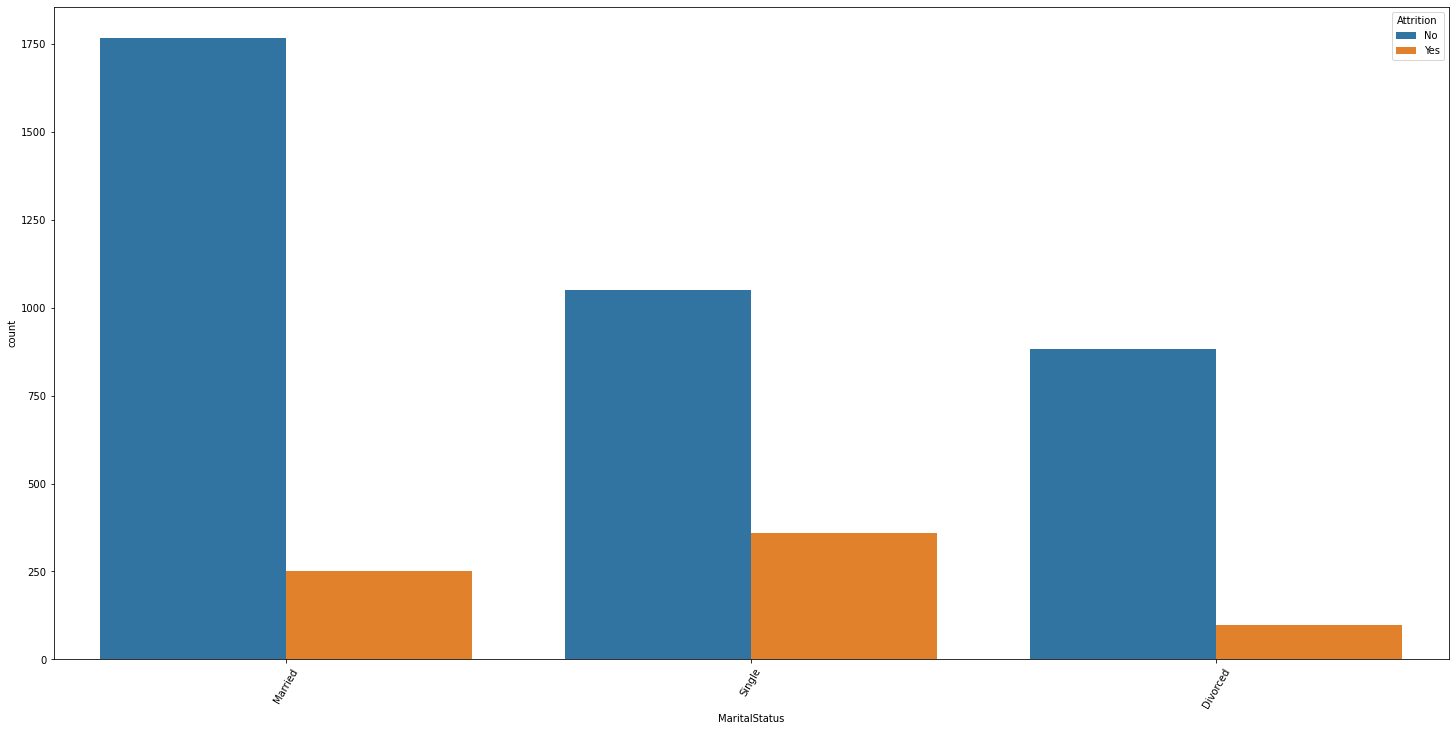

In [35]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data);
plt.xticks(rotation = 60);

Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dengan status pernikahan single

### Analysis Exploratory Data Analysis


* Dari visualisasi terlihat bahwa kkaryawan yang memiliki kemungkinan resign berada pada rentang usia 17 sampai dengan 35 tahun
* Dari visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah yang memiliki rentang jarak rumah dari 10 sampai 20 
* Dari visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah dengan kategori edukasi kategori 2
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada job level 2
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada rentang endapatan bulanan 10000 sampai dengan 50000
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada rentang kenaikan pendapatan 15 samapi 25% 
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada stock option 1
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada total tahun kerja 0 -10 tahun
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada TrainingTimesLastYear 2 - 4
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign berada pada karyawan yang telah bekerja di range 5 sampai dengan 8 diperusahaan sebelumnya
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan yang telah bekerja diperusahaan dalam rentang waktu 0 sampai 5 tahun
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan yang telah memiliki rentang waktu 0 sampai 3 tahun setelah mendapatkan promosi terakhir
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan yang telah memiliki rentang waktu 0 sampai 2 tahun bekerja dengan manager saat ini
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan jarang melakukan business travel
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dari departemen research and development
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dengan latar belakang pendidikan Life sciences dan medical 
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan pria
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dengan job rule Sales executive dan Research Scientist
* Dari Visualisasi terlihat bahwa karyawan yang memiliki kemungkinan resign adalah karyawan dengan status pernikahan single

# Data Preprocessing

#### Membagi data terlebih dahulu sebelum menerapkan Rekayasa Fitur (Feature Engineering)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data, data['Attrition'],test_size=0.1,random_state=0)

untuk menghindari adanya kemungkinan kebocoran data sehingga kita perlu membagi data terlebih dahulu dan kemudian menerapkan fitur engineering

## Features Engineering

#### Mempersiapkan data untuk dilakukan feature engineering

In [37]:
df = X_train

In [38]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1118,38,No,Travel_Rarely,Research & Development,3,4,Life Sciences,1,1119,Female,1,Sales Representative,Divorced,44900,2.0,Y,21,8,1,10.0,1,5,0,3
2106,54,No,Travel_Rarely,Research & Development,9,4,Life Sciences,1,2107,Male,2,Sales Executive,Married,20930,3.0,Y,19,8,0,36.0,2,10,0,9
3920,23,No,Travel_Rarely,Sales,6,4,Life Sciences,1,3921,Male,3,Manufacturing Director,Single,103220,1.0,Y,14,8,2,3.0,2,3,1,2
3562,32,No,Travel_Frequently,Sales,10,3,Life Sciences,1,3563,Female,1,Sales Executive,Married,102660,1.0,Y,11,8,0,2.0,3,2,2,2
2452,39,No,Non-Travel,Research & Development,3,3,Life Sciences,1,2453,Female,2,Manufacturing Director,Married,109760,1.0,Y,11,8,0,9.0,3,9,5,8


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3969 entries, 1118 to 2732
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      3969 non-null   int64  
 1   Attrition                3969 non-null   object 
 2   BusinessTravel           3969 non-null   object 
 3   Department               3969 non-null   object 
 4   DistanceFromHome         3969 non-null   int64  
 5   Education                3969 non-null   int64  
 6   EducationField           3969 non-null   object 
 7   EmployeeCount            3969 non-null   int64  
 8   EmployeeID               3969 non-null   int64  
 9   Gender                   3969 non-null   object 
 10  JobLevel                 3969 non-null   int64  
 11  JobRole                  3969 non-null   object 
 12  MaritalStatus            3969 non-null   object 
 13  MonthlyIncome            3969 non-null   int64  
 14  NumCompaniesWorked   

In [40]:
for col in df.columns:
    print(col, df[col].unique()[0:30], "\n")

Age [38 54 23 32 39 48 28 30 41 37 46 36 45 56 43 34 52 49 55 35 40 21 31 29
 27 33 20 53 22 50] 

Attrition ['No' 'Yes'] 

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department ['Research & Development' 'Sales' 'Human Resources'] 

DistanceFromHome [ 3  9  6 10 25  1  8 27 22  4  2  7 26 12 16 21 14 29 28 18 23  5 15 24
 11 20 19 13 17] 

Education [4 3 2 1 5] 

EducationField ['Life Sciences' 'Medical' 'Technical Degree' 'Other' 'Marketing'
 'Human Resources'] 

EmployeeCount [1] 

EmployeeID [1119 2107 3921 3563 2453 1274 3584 2040 1301 1428 1328 2772 2491 3537
 2858   89 3174  292  818  149   32 3960 3737  649 3184 1278 2077 4235
 1733  379] 

Gender ['Female' 'Male'] 

JobLevel [1 2 3 4 5] 

JobRole ['Sales Representative' 'Sales Executive' 'Manufacturing Director'
 'Laboratory Technician' 'Manager' 'Human Resources' 'Research Scientist'
 'Healthcare Representative' 'Research Director'] 

MaritalStatus ['Divorced' 'Married' 'Single'] 

MonthlyIncome [ 4490

### Missing Values

#### melakukan pengecekan data missing pada categorical features

In [41]:
categories_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in categories_nan:
    print('{} : {} % missing values'.format(feature, np.round(data[feature].isnull().mean(),4)))

terlihat dari informasi tidak terdapat missing values pada data kategories

#### melakukan pengecekan data missing pada numerical features

In [42]:
numerical_nan = [feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O' ]

for feature in numerical_nan:
    print('{}: {} % missing values'.format(feature, np.round(data[feature].isnull().mean(),4)))

NumCompaniesWorked: 0.0043 % missing values
TotalWorkingYears: 0.002 % missing values


#### mengatasi missing values

In [43]:
df.dropna(inplace=True) 

<ipython-input-43-031a2172b3d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


karena persentase data missing values sangat kecil maka data yang hilang tersebut akan di drop

### Menghapus kolom

In [44]:
col_to_drop = ['EmployeeCount', 'StandardHours', 'EmployeeID', 'Over18']

df = df.drop(col_to_drop, axis=1)

feature 'EmployeeCount', 'Over18' dan 'EmployeeID' dihapus karena hanya menunjukan data karyawan tersebut dan tidak diperlukan dalam modeling

### Melakukan proses binning pada continous features

In [45]:
continuous_feature = [var for var in data.columns if data[var].dtype!='O'  and var not in discrete_features]

print("Jumlah continuous feature {}".format(len(continuous_feature)))
print("\n")
print("continuous feature : \n ", continuous_feature)

Jumlah continuous feature 10


continuous feature : 
  ['Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [46]:
df['Age'] = pd.cut(df['Age'], [15 , 20 , 25, 30 , 35 , 40 , 45 , 50, 55, 60 ], labels=[1,2,3,4,5,6,7,8,9]).astype('int64')

In [47]:
df['DistanceFromHome'] = pd.cut(df['DistanceFromHome'], [0 , 3 , 6, 9 , 12 , 15 , 18 , 21, 24, 27, 30 ], labels=[1,2,3,4,5,6,7,8,9,10]).astype('int64')

In [48]:
df['MonthlyIncome'] = pd.cut(df['MonthlyIncome'], [0 , 20000 , 40000, 60000 , 80000 , 100000 , 120000 , 140000 , 160000, 180000, 200000 ], labels=[1,2,3,4,5,6,7,8,9,10]).astype('int64')

In [49]:
df['PercentSalaryHike'] = pd.cut(df['PercentSalaryHike'], [10 , 12 , 14, 16 , 18 , 20 , 22 , 24, 26], labels=[1,2,3,4,5,6,7,8]).astype('int64')

In [50]:
df['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'], [-0.1 , 4.0 , 8.0, 12.0, 16.0, 20.0, 24.0, 28.0, 32.0, 36.0, 40.0], labels=[1,2,3,4,5,6,7,8,9,10]).astype('int64')

In [51]:
df['YearsAtCompany'] = pd.cut(df['YearsAtCompany'], [-0.1 , 4 , 8, 12, 16, 20, 24, 28, 32, 36, 40], labels=[1,2,3,4,5,6,7,8,9,10]).astype('int64')

In [52]:
df['YearsSinceLastPromotion'] = pd.cut(df['PercentSalaryHike'], [0 , 2, 4, 6, 8, 10, 12, 14, 16], labels=[1,2,3,4,5,6,7,8]).astype('int64')

In [53]:
df['YearsWithCurrManager'] = pd.cut(df['YearsWithCurrManager'], [-0.1 , 2, 4, 6, 8, 10, 12, 14, 16, 18], labels=[1,2,3,4,5,6,7,8,9]).astype('int64')

### Mengubah kategorikal features menjadi numerical features

In [54]:
categorical_features = [feature for feature in df.columns if  df[feature].dtypes=='O']
categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus']

In [55]:
attrition_mapping = { k: i for i, k in enumerate(df['Attrition'].unique(), 0)}
BusinessTravel_mapping = { k: i for i, k in enumerate(df['BusinessTravel'].unique(), 0)}
Department_mapping = { k: i for i, k in enumerate(df['Department'].unique(), 0)}
EducationField_mapping = { k: i for i, k in enumerate(df['EducationField'].unique(), 0)}
Gender_mapping = { k: i for i, k in enumerate(df['Gender'].unique(), 0)}
JobRole_mapping = { k: i for i, k in enumerate(df['JobRole'].unique(), 0)}
MaritalStatus_mapping = { k: i for i, k in enumerate(df['MaritalStatus'].unique(), 0)}

In [56]:
df['Attrition'] = df['Attrition'].map(attrition_mapping)
df['BusinessTravel'] = df['BusinessTravel'].map(BusinessTravel_mapping)
df['Department'] = df['Department'].map(Department_mapping)
df['EducationField'] = df['EducationField'].map(EducationField_mapping)
df['Gender'] = df['Gender'].map(Gender_mapping)
df['JobRole'] = df['JobRole'].map(JobRole_mapping)
df['MaritalStatus'] = df['MaritalStatus'].map(MaritalStatus_mapping)

#### melakukan pengecekan data setelah proses binning dan transformasi kategorikal

In [57]:
for col in df.columns:
    print(col, df[col].unique()[0:30], "\n")

Age [5 8 2 4 7 3 6 9 1] 

Attrition [0 1] 

BusinessTravel [0 1 2] 

Department [0 1 2] 

DistanceFromHome [ 1  3  2  4  9  8  6  7  5 10] 

Education [4 3 2 1 5] 

EducationField [0 1 2 3 4 5] 

Gender [0 1] 

JobLevel [1 2 3 4 5] 

JobRole [0 1 2 3 4 5 6 7 8] 

MaritalStatus [0 1 2] 

MonthlyIncome [ 3  2  6  9  7  4  5 10  1  8] 

NumCompaniesWorked [2. 3. 1. 5. 7. 4. 6. 0. 9. 8.] 

PercentSalaryHike [6 5 2 1 4 3 7 8] 

StockOptionLevel [1 0 2 3] 

TotalWorkingYears [ 3  9  1  2  4  5  7  6  8 10] 

TrainingTimesLastYear [1 2 3 0 4 5 6] 

YearsAtCompany [ 2  3  1  5  8  4  6  9  7 10] 

YearsSinceLastPromotion [3 1 2 4] 

YearsWithCurrManager [2 5 1 4 7 3 8 6 9] 



#### melakukan pengecekan data

In [58]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1118,5,0,0,0,1,4,0,0,1,0,0,3,2.0,6,1,3,1,2,3,2
2106,8,0,0,0,3,4,0,1,2,1,1,2,3.0,5,0,9,2,3,3,5
3920,2,0,0,1,2,4,0,1,3,2,2,6,1.0,2,2,1,2,1,1,1
3562,4,0,1,1,4,3,0,0,1,1,1,6,1.0,1,0,1,3,1,1,1
2452,5,0,2,0,1,3,0,0,2,2,1,6,1.0,1,0,3,3,3,1,4


In [59]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [60]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Menentukan Features pilihan

In [61]:
col_to_use = ['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

dataset = df.copy()
dataset = df[col_to_use]
dataset.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1118,5,0,0,0,1,4,0,0,1,0,0,3,2.0,6,1,3,1,2,3,2
2106,8,0,0,0,3,4,0,1,2,1,1,2,3.0,5,0,9,2,3,3,5
3920,2,0,0,1,2,4,0,1,3,2,2,6,1.0,2,2,1,2,1,1,1
3562,4,0,1,1,4,3,0,0,1,1,1,6,1.0,1,0,1,3,1,1,1
2452,5,0,2,0,1,3,0,0,2,2,1,6,1.0,1,0,3,3,3,1,4


# Modeling Pipeline (Pendefinisian dan Pelatihan Model)

untuk melakukan kalsifikasi terhadap data karyawan menggunakan 3 model classifier yang berbeda yaitu:
* model linear yaitu Logistic Regression classifier Model untuk melakukan memprediksi nilai probabilitas yang dipetakan ke dua kelas (klasifikasi biner).
* model neighbors yaitu KNeighborsClassifier untuk mengimplemetasikan klasifikasi berdasarkan pemilihan the k-nearest neighbors.
* model ensembel yaitu RandomForestClassifier dimana Penentuan klasifikasi dengan random forest diambil berdasarkan hasil voting dari tree yang terbentuk

untuk parameter yang digunakan adalah parameter default untuk melihat kemampuan dasar dari tiap algoritma untuk melakukan klasifikasi

In [62]:
# Menentukan Variabel Bebas (X) dan Variabel terikat (y
X = dataset.drop('Attrition', axis=1)
y = dataset['Attrition']

# mengatasi imbalaced data dengan smote oversampling
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

# split data
X_train, X_val, y_train, y_val = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)


# Creating a preprocessing and modelling pipeline
logreg_model = Pipeline(steps=[("model", LogisticRegression(random_state=42))])

knn_model = Pipeline(steps=[("model", KNeighborsClassifier())])

rfc_model = Pipeline(steps=[("model", RandomForestClassifier(random_state=42))])


# Fit model LogisticRegression
logreg_model.fit(X_train, y_train)

# Fit model KNeighbors Classifier
knn_model.fit(X_train, y_train)

# Fit model Random Forest Classifier
rfc_model.fit(X_train, y_train)

# model scores
print('Logistic Regression score: \n', np.round(logreg_model.score(X_val, y_val),2))
print("\n")
print('KNeighbors Classifier score: \n', np.round(knn_model.score(X_val, y_val),2))
print("\n")
print('Random Forest Classifier score: \n', np.round(rfc_model.score(X_val, y_val),2))

Logistic Regression score: 
 0.68


KNeighbors Classifier score: 
 0.88


Random Forest Classifier score: 
 0.99


Logisctic Regression : 
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       992
           1       0.68      0.68      0.68       993

    accuracy                           0.68      1985
   macro avg       0.68      0.68      0.68      1985
weighted avg       0.68      0.68      0.68      1985

KNeighbors Classifier : 
              precision    recall  f1-score   support

           0       1.00      0.77      0.87       992
           1       0.81      1.00      0.90       993

    accuracy                           0.88      1985
   macro avg       0.91      0.88      0.88      1985
weighted avg       0.91      0.88      0.88      1985

Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       992
           1       0.99      0.99      0.99       993

    accuracy                           0.99      1985
   macro avg       0.99      0.99      0.99      19

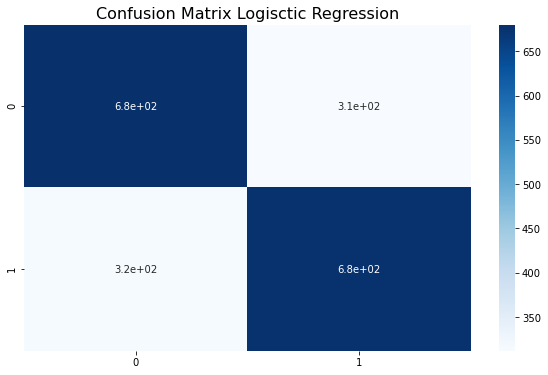

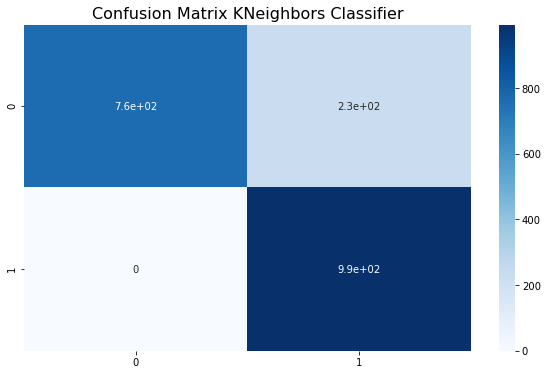

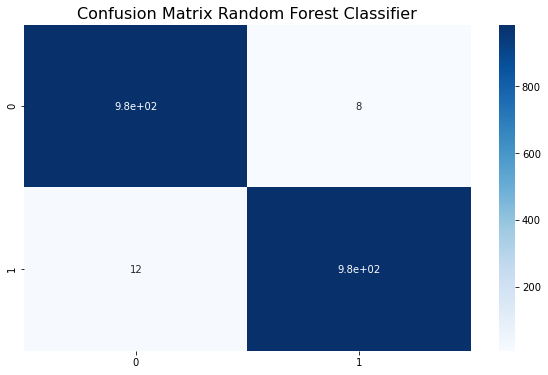

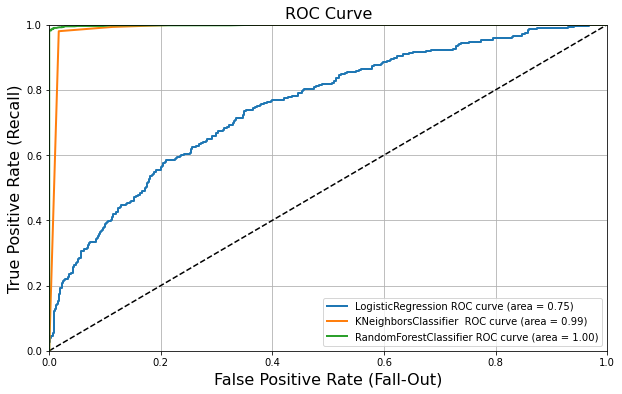

In [63]:
# evaluation model logistic
y_preds_log = logreg_model.predict(X_val)

print("Logisctic Regression : ")
print(classification_report(y_val , y_preds_log))

# evaluation model KNeighbors Classifier
y_preds_knn = knn_model.predict(X_val)

print("KNeighbors Classifier : ")
print(classification_report(y_val, y_preds_knn))

# evaluation model Random Forest Classifier
y_preds_rfc = rfc_model.predict(X_val)

print("Random Forest Classifier : ")
print(classification_report(y_val, y_preds_rfc))

# Confusion Matrix Logisctic Regression
log = confusion_matrix(y_val, y_preds_log)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix Logisctic Regression", size=16)
sns.heatmap(log, annot=True, cmap="Blues")

# Confusion Matrix KNeighbors Classifier
knn = confusion_matrix(y_val, y_preds_knn)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix KNeighbors Classifier", size=16)
sns.heatmap(knn, annot=True, cmap="Blues")

# Confusion Matrix Random Forest Classifier
rfc = confusion_matrix(y_val, y_preds_rfc)
plt.figure(figsize=(10, 6))
plt.title("Confusion Matrix Random Forest Classifier", size=16)
sns.heatmap(rfc, annot=True, cmap="Blues")

# ROC Curve
plt.figure(figsize=(10, 6))
plt.title("ROC Curve", size=16)
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['LogisticRegression', 'KNeighborsClassifier ', 'RandomForestClassifier']
for idx,model in enumerate([logreg_model, knn_model, rfc_model]):
    y_scores = model.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

keterangan:

* Accuracy = Keakuratan model dalam bentuk desimal. Akurasi sempurna sama dengan 1,0.
* Precision = Menunjukkan kemampuan pengklasifikasi untuk tidak memberi label positif pada sampel yang negatif (tp / (tp + fp)). Sebuah model yang tidak menghasilkan positif palsu memiliki presisi 1,0.
* Recall = Menunjukkan kemampuan pengklasifikasi untuk menemukan semua sampel positif (tp / (tp + fn)). Sebuah model yang tidak menghasilkan negatif palsu memiliki recall 1,0.
* ROC = perbandingan antara true positive rate (tpr) model dan false positive rate (fpr). Model yang sempurna mencapai skor AUC 1,0.

# Model Evaluation

dari hasil evaluasi perbandingan antar 3 model klasifikasi yatu model Logistic regression, model KNeighbors Classifier, dan model **Random Forest classifier** maka model yang terpilih adalah model Random Forest classifier karena memiliki **f1-score** terbaik yaitu **0.99** dan **ROC Curve sebesar 0.99** 

# Model Improvement

model improvement akan dilakukan dengan menggunakan GridSearchCV terhadap model terpilih yaitu Random Forest Classifier untuk mendapatkankan parameter terbaik

parameter yang diuji adalah:
* jumlah trees (n_estimators) yang berjumlah 50, 100, dan 200
* Jumlah fitur yang perlu dipertimbangkan saat mencari split terbaik (max_features) yang berjumlah 1, 2, 3

In [64]:
pipe = Pipeline([('classifier', RandomForestClassifier())])

param_grid = [
    {'classifier': [RandomForestClassifier(n_estimators=100)],
     'classifier__n_estimators': [50, 100, 200] ,'classifier__max_features': [1, 2, 3]
    }]

grid_model = GridSearchCV(pipe, param_grid, cv=5)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             param_grid=[{'classifier': [RandomForestClassifier(max_features=1,
                                                                n_estimators=200)],
                          'classifier__max_features': [1, 2, 3],
                          'classifier__n_estimators': [50, 100, 200]}])

In [65]:
print("Best estimator:\n{}".format(grid_model.best_estimator_))

Best estimator:
Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_features=1, n_estimators=200))])


In [66]:
print("Best cross-validation score: {:.2f}".format(grid_model.best_score_))
print("Test-set score: {:.2f}".format(grid_model.score(X_val, y_val)))

Best cross-validation score: 0.98
Test-set score: 0.99


Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       992
           1       0.99      0.99      0.99       993

    accuracy                           0.99      1985
   macro avg       0.99      0.99      0.99      1985
weighted avg       0.99      0.99      0.99      1985

ROC Curve : 


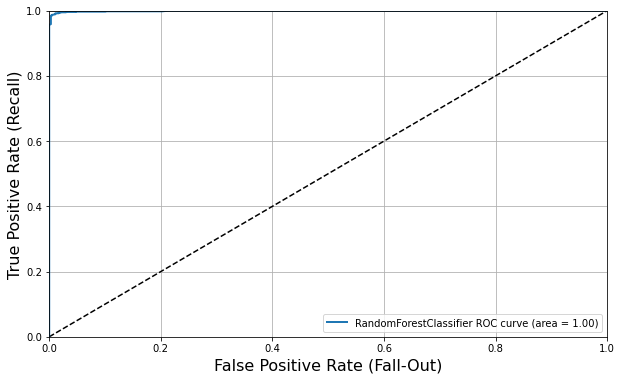

In [67]:
# evaluation model Random Forest Classifier
y_preds_grid = grid_model.predict(X_val)

print("Random Forest Classifier : ")
print(classification_report(y_val, y_preds_grid))

# ROC Curve
print("ROC Curve : ")
plt.figure(figsize=(10, 6))                                    
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
labels=['RandomForestClassifier']
for idx,model in enumerate([grid_model]):
    y_scores = model.predict_proba(X_val)
    fpr, tpr, thresholds = roc_curve(y_val, y_scores[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linewidth=2,label=labels[idx] + ' ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right");

### Analysis Model Improvement

dari hasil model improvement dengan menggunakan GridSearchCV didapatkan best parameter sebagai berikut:
    
* Jumlah n_estimators adalah 100
* jumlah max_features adalah 3

dengan nilai evaluasi performa:

* menghasilkan score akurasi sebesar 0.99
* menghasilkan score f1-score sebesar 0.99
* menghasilkan ROC score sebesar 1,00

# Model Inference

#### membuat data baru

In [68]:
values_1 = [5, 0, 0, 8, 3, 0, 1, 1, 3, 2, 7, 1.0, 1, 1, 3, 5, 3, 1, 4]
values_2 = [5, 0, 0, 1, 4, 0, 0, 1, 0, 0, 3, 2.0, 6, 1, 3, 1, 2, 3, 2]

In [69]:
values = [ values_1, values_2]

In [70]:
data_dummies = pd.DataFrame(values, columns=['Age', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'])

In [71]:
data_dummies

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,5,0,0,8,3,0,1,1,3,2,7,1.0,1,1,3,5,3,1,4
1,5,0,0,1,4,0,0,1,0,0,3,2.0,6,1,3,1,2,3,2


#### melakukan prediksi dengan data baru

In [72]:
predictions = grid_model.predict(data_dummies)

print("Hasil Klasifikasi model Random Forest: \n")
if predictions[0] == 0 :
    print("Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan karyawan tersebut akan bertahan")
else:
    print("Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 1 ('Yes') atau ada kemungkinan karyawan tersebut akan berhenti")

print("\n")
if predictions[1] == 0 :
    print("Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan karyawan tersebut akan bertahan")
else:
    print("Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 1 ('Yes') atau ada kemungkinan karyawan tersebut akan berhenti")

Hasil Klasifikasi model Random Forest: 

Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 1 ('Yes') atau ada kemungkinan karyawan tersebut akan berhenti


Dari hasil prediksi dengan menggunakan data baru didapatkan nilai 0 ('No') atau ada kemungkinan karyawan tersebut akan bertahan
